This notebook plots summary plots for some stats on the footprint following the depth+ebv cuts, comparing those from OpSim dbs vs. `ow6` and `ow7`  outputs.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import pickle

In [2]:
fontsize = 16
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize
pylab.rcParams['axes.linewidth'] = 2

In [3]:
# want specific ordering of the dbs so write them out
dbs = ['baseline2018a', 'kraken_2026', 'kraken_2035', 'colossus_2665', \
          'colossus_2664', 'colossus_2667', 'pontus_2002', 'pontus_2489', 'pontus_2502', 'mothra_2045']
outDir = '/global/cscratch1/sd/awan/lsst_output/owsee_comparisons/'

# set up for plots
colors = ['m', 'b', 'g', 'k']
shapes = ['o', 'v', 's', 'd']

In [4]:
dicts_all = {}
for owtag in ['ow6', 'ow7']:
    print('Reading in %s data'%owtag)
    dicts_owsee = {}
    outDir_owsee = '/global/cscratch1/sd/awan/lsst_output/owsee_comparisons/depth_cuts/'
    for dbname in dbs:
        files = [f for f in os.listdir(outDir_owsee) if f.__contains__(dbname) \
                            and f.endswith('pickle') and f.__contains__(owtag)]
        # need to separate alt_sched from alt_sched_rolling
        if dbname=='alt_sched':
            files = [f for f in files if not f.__contains__('rolling')]
        if len(files)>1:
            raise ValueError('Have more than one files: %s'%files)
        # consider the files
        for filename in files:
            print('Read in data for %s'%dbname)
            with open('%s/%s'%(outDir_owsee, filename), 'rb') as handle:
                dicts_owsee[dbname] = pickle.load(handle)
    nDbs = len(dicts_owsee.keys())
    print('%s dbs'%nDbs)
    # add to the main dictionary
    dicts_all[owtag] = dicts_owsee

print('\nNow reading in Opsim data')
# now read OpSim outputs for the same dbs
outDir_opsim = '/global/homes/a/awan/desc/depth_data_outputs/'
dicts_opsim = {}
for dbname in dicts_owsee.keys():
    files = [f for f in os.listdir(outDir_opsim) if f.__contains__(dbname) \
                                                     and f.endswith('pickle')]
    # need to separate alt_sched from alt_sched_rolling
    if dbname=='alt_sched':
        files = [f for f in files if not f.__contains__('rolling')]
    if len(files)>1:
        raise ValueError('Have more than one files: %s'%files)
    # consider the files
    for filename in files:
        print('Read in data for %s'%dbname)
        with open('%s/%s'%(outDir_opsim, filename), 'rb') as handle:
            dicts_opsim[dbname] = pickle.load(handle)
            
nDbs = len(dicts_opsim.keys())
print('%s dbs'%nDbs)
# add to the main dictionary
dicts_all['opsim'] = dicts_opsim

Reading in ow6 data
Read in data for baseline2018a
Read in data for kraken_2026
Read in data for kraken_2035
Read in data for colossus_2665
Read in data for colossus_2664
Read in data for colossus_2667
Read in data for pontus_2002
Read in data for pontus_2489
Read in data for pontus_2502
Read in data for mothra_2045
10 dbs
Reading in ow7 data
Read in data for baseline2018a
Read in data for kraken_2026
Read in data for kraken_2035
Read in data for colossus_2665
Read in data for colossus_2664
Read in data for colossus_2667
Read in data for pontus_2002
Read in data for pontus_2489
Read in data for pontus_2502
Read in data for mothra_2045
10 dbs

Now reading in Opsim data
Read in data for baseline2018a
Read in data for kraken_2026
Read in data for kraken_2035
Read in data for colossus_2665
Read in data for colossus_2664
Read in data for colossus_2667
Read in data for pontus_2002
Read in data for pontus_2489
Read in data for pontus_2502
Read in data for mothra_2045
10 dbs


**Plot the usable area for different cadences**

Saved compare_area_10dbs_ow6_ow7_opsim.png


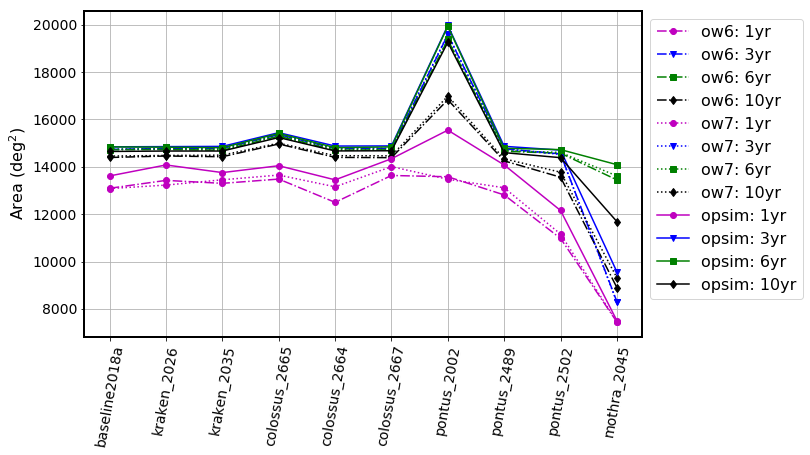

In [5]:
sty = ['-.', ':', '-']

filetag = '_'
for sty_ind, seeing_key in enumerate(dicts_all.keys()):
    filetag += seeing_key
    if sty_ind!=len(dicts_all)-1:
        filetag += '_'
    dicts = dicts_all[seeing_key]
    xlabels = []
    # first need to create the lists with the data each yr_cut
    areas = {}
    for dbname in dicts:  # loop over dbs
        if dbname.__contains__('_rolling_mix_10yrs'):
            label = dbname.split('_rolling_mix_10yrs')[0]
        else:
            label = dbname
        xlabels.append(label)
        for yr_cut in dicts[dbname]['Area (deg$^2$)'].keys():  # loop over yr cuts
            if yr_cut not in areas: areas[yr_cut] = []
            # add this db's area
            areas[yr_cut].append(dicts[dbname]['Area (deg$^2$)'][yr_cut])

    # now plot the area
    for i, yr_cut in enumerate(areas):
        plt.plot(range(nDbs), areas[yr_cut], '%s%s'%(shapes[i], sty[sty_ind]),
                 color=colors[i], label='%s: %s'%(seeing_key, yr_cut) )
# plot details
plt.legend(bbox_to_anchor=(1.,1))
plt.grid()
plt.ylabel(r'Area (deg$^2$)')
plt.xticks(range(nDbs), xlabels, rotation=80)
filename = 'compare_area_%sdbs%s.png'%(nDbs, filetag)
plt.savefig('%s/%s'%(outDir, filename), format= 'png', bbox_inches='tight')
print('Saved %s'%filename)
plt.show()

We have less area for Y1, Y10 with `owsee` outputs than for Opsim ones. The difference is bigger for Y1 than for Y10, except for pontus_2002 where the decrease in Y10 area is rather stark (~3K deg2 loss) while we see `owsee` dbs giving the large coverage in Y3, Y6. 

`ow6`, `ow7` lead to very similar area, except for Y1 where `ow7` leads to slightly more area than `ow6`.

**Plot the i-band median depth + std for different cadences**

Saved compare_depth_median_10dbs_ow6_ow7_opsim.png


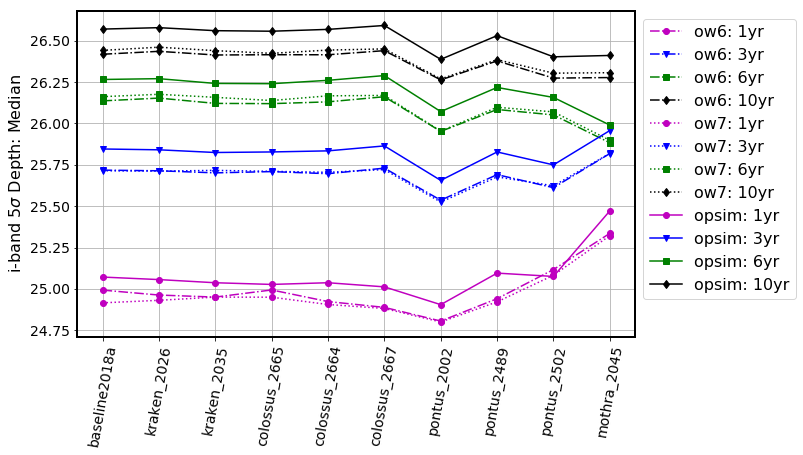

Saved compare_depth_std_10dbs_ow6_ow7_opsim.png


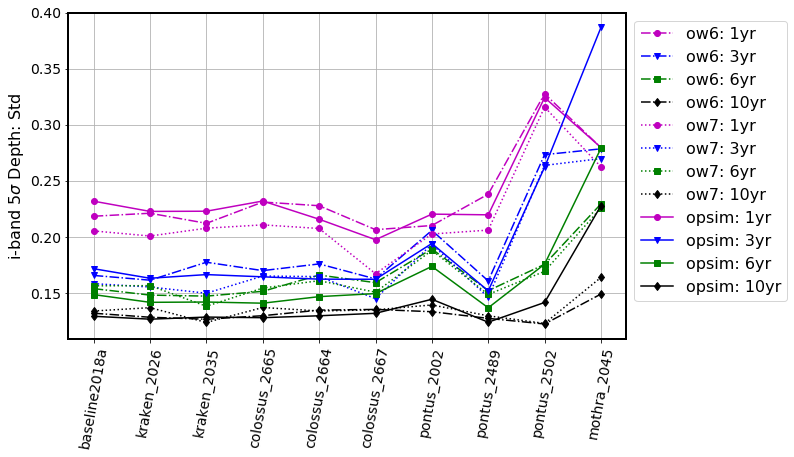

In [6]:
for stat in ['median', 'std']:
    filetag = '_'
    for sty_ind, seeing_key in enumerate(dicts_all.keys()):
        filetag += seeing_key
        if sty_ind!=len(dicts_all)-1:
            filetag += '_'
        dicts = dicts_all[seeing_key]
        depths = {}
        for band in ['i']:
            depth_stat = {}
            stat_key = [f for f in dicts[dbname].keys() if f.__contains__(stat.capitalize())][0]
            for dbname in dicts: # loop over dbs
                for yr_cut in areas: # loop over yr_cuts
                    if yr_cut not in depth_stat: depth_stat[yr_cut] = []
                    # add this db's depth
                    depth_stat[yr_cut].append(dicts[dbname][stat_key]['%s_%s'%(yr_cut, band)])

            # now plot the data
            for i, yr_cut in enumerate(areas):
                plt.plot(range(nDbs), depth_stat[yr_cut], '%s%s'%(shapes[i], sty[sty_ind]),
                         color=colors[i], label='%s: %s'%(seeing_key, yr_cut) )

            if stat=='median': # save the median for the summary table plot
                depths = depth_stat
    # plot details
    plt.legend(bbox_to_anchor=(1.,1))
    plt.grid()
    plt.ylabel(r'%s-band 5$\sigma$ Depth: %s'%(band, stat.capitalize()))
    plt.xticks(range(nDbs), xlabels, rotation=80)
    filename = 'compare_depth_%s_%sdbs%s.png'%(stat, nDbs, filetag)
    plt.savefig('%s/%s'%(outDir, filename), format= 'png', bbox_inches='tight')
    print('Saved %s'%filename)
    plt.show()

We have ~1/8 mag shallower median depth with `owsee` outputs than for Opsim ones for Y3,6,10 while difference ranges from +~.01 mag to -1/8 mag for Y1.

The trends in depth variation are more dependent on the cadence and the year. For example, `owsee` leads to more non-uniformity for Y3,6 than Opsim for pontus_2002 but less for Y1,10, while it reduces non-uniformity for baseline2018a for Y1,3 and increases it a little for Y6,10.

`ow6`, `ow7` lead to very similar median and std values, except for Y1 variation where `ow6` leads to more variation than `ow7`.